# **IMPORT LIBRARY**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# **LOAD DATASET**

In [2]:
base_dir = '/Users/rio/Documents/RIO/Pemrograman/Reasearch/EEG To Text Representation/Dataset/KELAS B'
file_name_to_find = 'UK.log.processed.csv'
all_dataframes = {}

# Iterasi melalui setiap item di dalam direktori 'KELAS B'
for student_folder in os.listdir(base_dir):
    # Buat jalur lengkap ke folder siswa
    student_path = os.path.join(base_dir, student_folder)
    
    # Pastikan item tersebut benar-benar sebuah folder (direktori)
    if os.path.isdir(student_path):
        # Buat jalur lengkap ke file CSV yang dicari
        file_path = os.path.join(student_path, file_name_to_find)
        
        # Periksa apakah file tersebut ada di lokasi yang diharapkan
        if os.path.exists(file_path):
            try:
                # Memuat file CSV ke dalam DataFrame
                df = pd.read_csv(file_path)
                
                # Simpan DataFrame dengan nama folder siswa sebagai kunci (key)
                all_dataframes[student_folder] = df
                
            except Exception as e:
                print(f"❌ Gagal memuat file {file_path}: {e}")
        else:
            print(f"⚠️ File tidak ditemukan di: {file_path}")

print("\n--- Selesai ---")
print(f"Jumlah DataFrame yang berhasil dimuat: {len(all_dataframes)}")


--- Selesai ---
Jumlah DataFrame yang berhasil dimuat: 28


In [3]:
for i in range(len(all_dataframes)):
    name = f'df_{list(all_dataframes.keys())[i]}'
    vars()[name] = all_dataframes[list(all_dataframes.keys())[i]]

In [4]:
print("nama dataframe:")
df_names = []
for i in range(len(all_dataframes)):
    df_names.append(f'df_{list(all_dataframes.keys())[i]}')
print(df_names)

nama dataframe:
['df_ZHAF', 'df_SALSABILA', 'df_DIAN', 'df_ALIF', 'df_LATHAN', 'df_ADITYA', 'df_FANDI', 'df_RAJENDRA', 'df_NAUFAL', 'df_NAFISA', 'df_AMANDA', 'df_JUAN', 'df_CHALLYSTA', 'df_M.A. ZAIDAN', 'df_DECKA', 'df_ADE', 'df_COANNA', 'df_KAYSAN', 'df_MUHAMMAD IRVAN', 'df_MUHAMMAD BILAL', 'df_YUDYA', 'df_NAYSILLA', 'df_MUHAMMAD RAYYA', 'df_CLAUDIA', 'df_ADRIANO', 'df_RIFFAT', 'df_VIQIH', 'df_PUTRAWAN']


In [5]:
df_ADITYA.head()

,'Time','VidTime','Signal Level','Blink','Attention','Meditation','Zone','Delta','Theta','Low Alpha','High Alpha','Low Beta','High Beta','Low Gamma','Mid Gamma',Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,11:38.0,00:00.0,100,2,35,41,38,57962,20516,20287,4472,4021,1808,1086,384,NaN,NaN,NaN,NaN,NaN
1,11:39.0,00:00.0,100,2,30,43,36,497469,51086,23048,19079,36046,35613,3027,3644,NaN,15738.77265,12432.40855,6017.904274,3079.357265
2,11:40.0,00:00.0,100,2,37,51,44,571117,175305,60824,132310,29859,23987,19048,4167,NaN,NaN,NaN,NaN,NaN
3,11:41.0,00:00.0,100,2,30,54,42,181981,257111,11422,48990,42992,24414,10322,6352,NaN,NaN,NaN,NaN,NaN
4,11:42.0,00:00.0,100,2,44,63,53,29851,11797,31254,25206,3670,9718,4775,2515,NaN,NaN,NaN,NaN,NaN


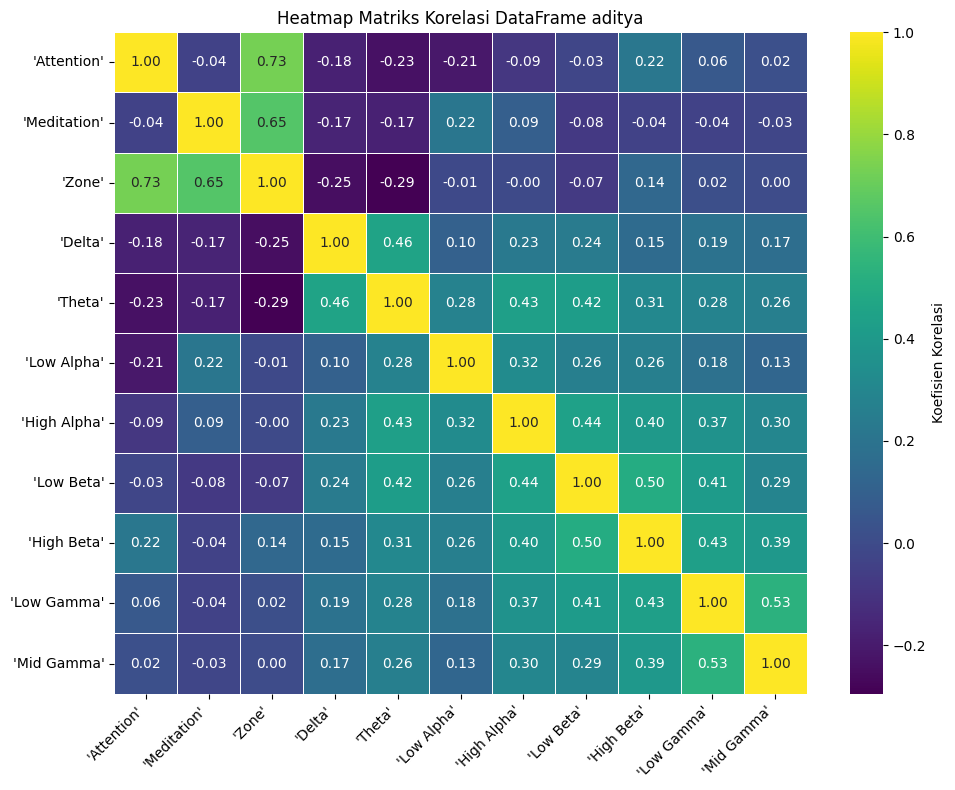

In [ ]:
kolom = ["'Attention'","'Meditation'","'Zone'","'Delta'","'Theta'","'Low Alpha'","'High Alpha'","'Low Beta'","'High Beta'","'Low Gamma'","'Mid Gamma'"]
# 3. Perhitungan Matriks Korelasi
correlation_matrix = df_ADITYA[kolom].corr()

# 4. Pembuatan Heatmap
plt.figure(figsize=(10, 8)) # Mengatur ukuran visualisasi

# Fungsi seaborn.heatmap() digunakan untuk membuat visualisasi
sns.heatmap(
    correlation_matrix,
    annot=True, # Menampilkan nilai korelasi pada setiap kotak
    fmt=".2f",  # Memformat angka menjadi 2 angka desimal
    cmap='viridis', # Memilih skema warna (viridis adalah pilihan yang baik)
    linewidths=.5, # Menambahkan garis tipis antar kotak
    cbar_kws={'label': 'Koefisien Korelasi'} # Label pada color bar
)

# Pengaturan Judul dan Label
plt.title('Heatmap Matriks Korelasi DataFrame aditya')
plt.xticks(rotation=45, ha='right') # Memutar label sumbu X agar mudah dibaca
plt.yticks(rotation=0)

# Menyimpan plot ke file (opsional)
plt.tight_layout()
plt.show() 

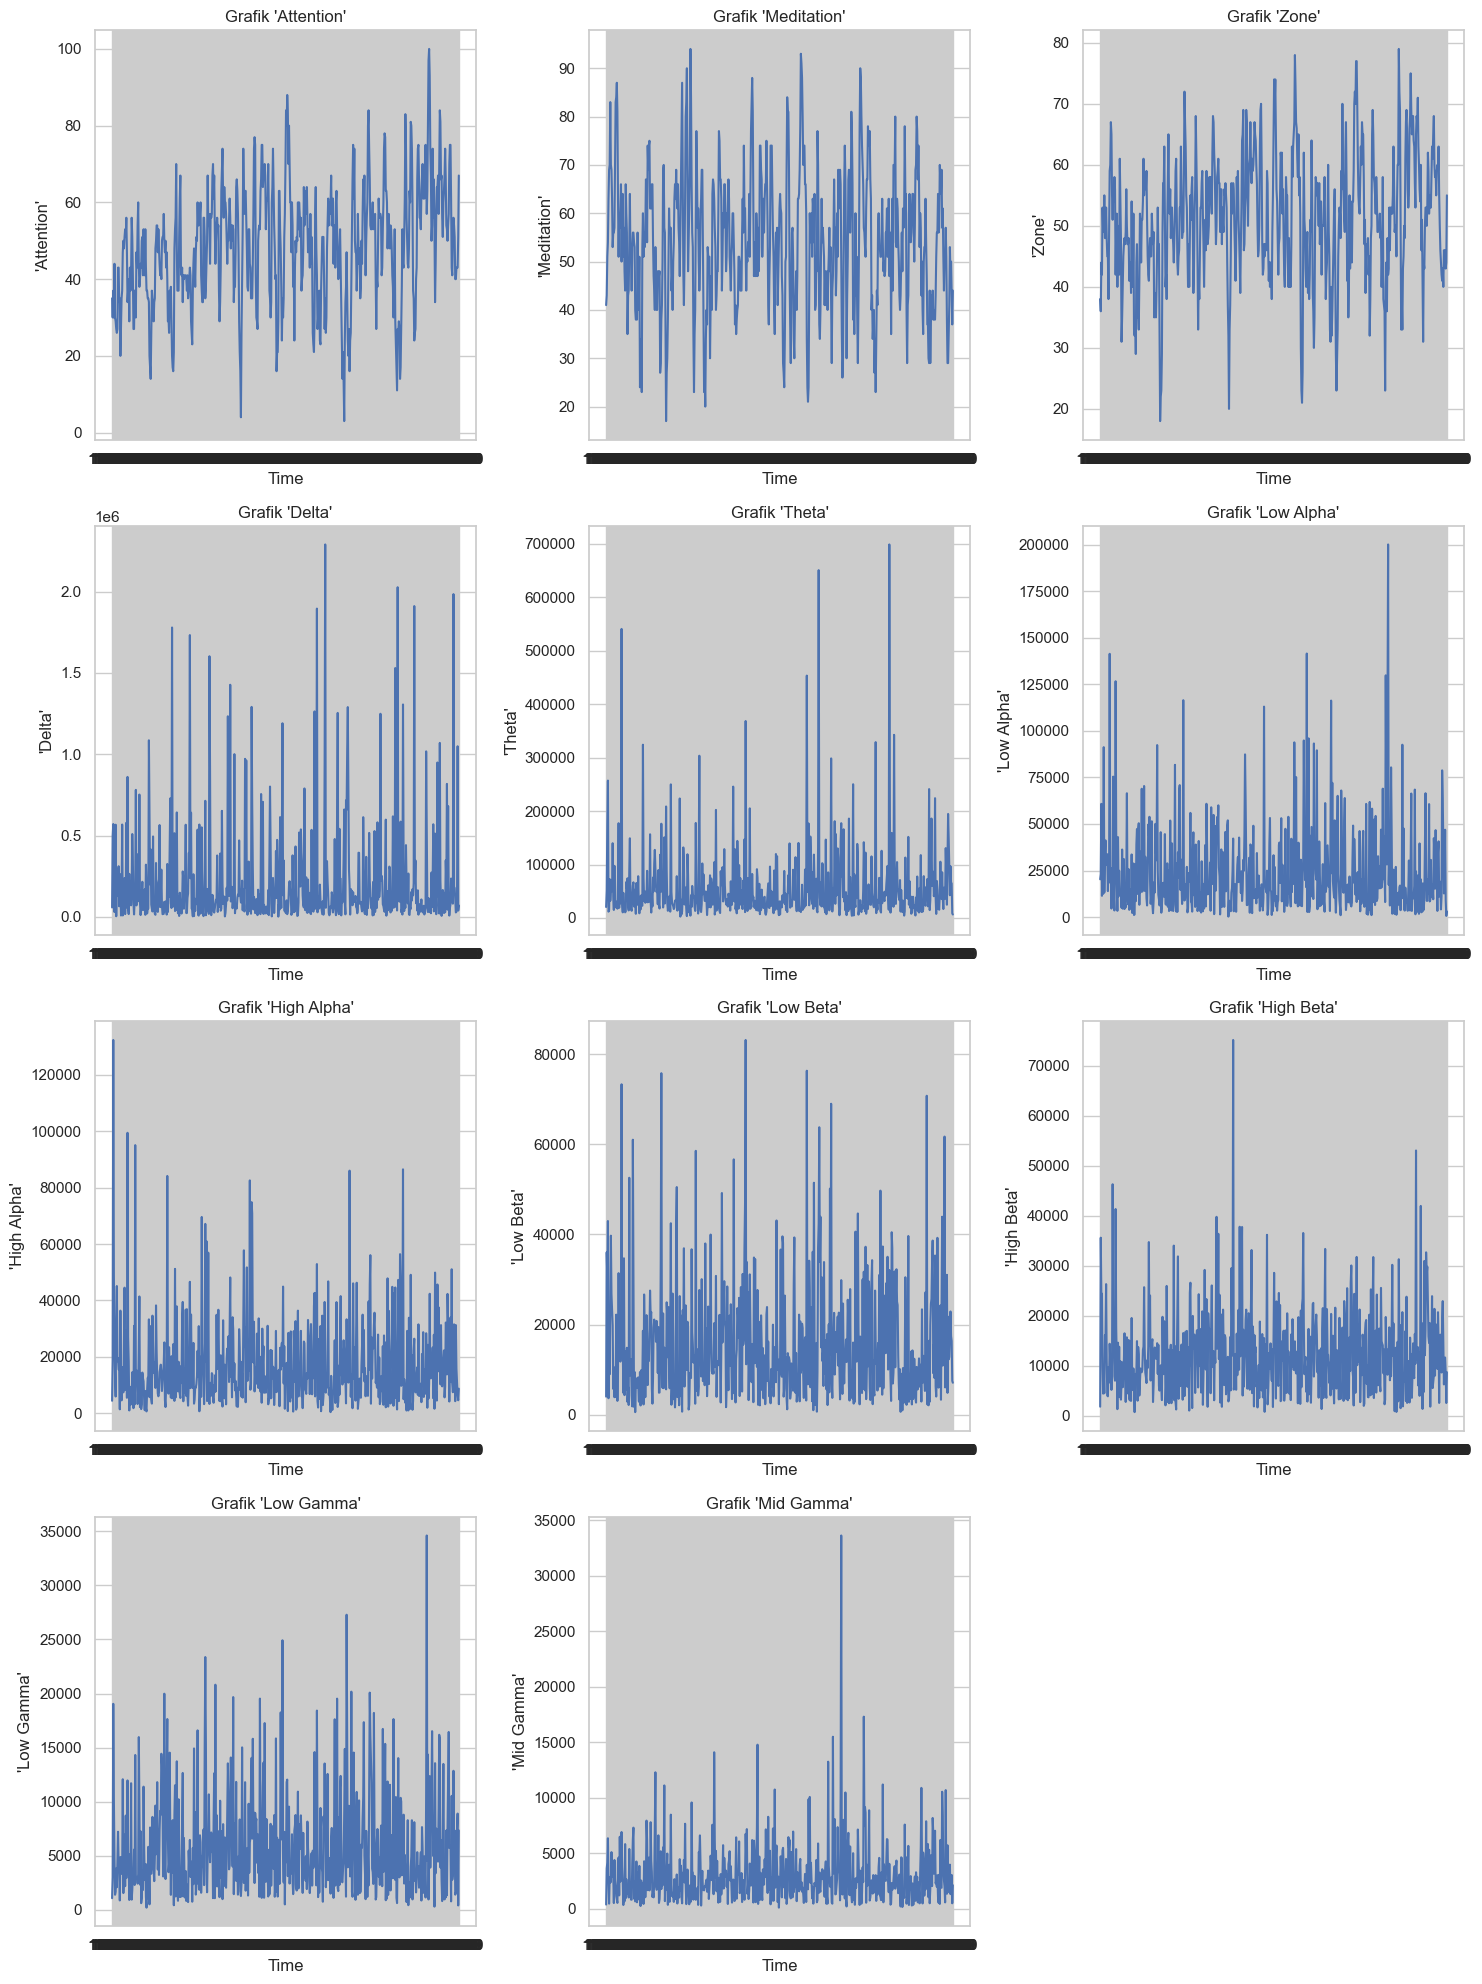

In [12]:
# Atur style Seaborn (opsional, untuk tampilan yang lebih baik)
sns.set_theme(style="whitegrid")

# Kolom yang ingin diplot
kolom = ["'Attention'","'Meditation'","'Zone'","'Delta'","'Theta'","'Low Alpha'","'High Alpha'","'Low Beta'","'High Beta'","'Low Gamma'","'Mid Gamma'"]

# Tentukan jumlah baris dan kolom subplot
jumlah_kolom = len(kolom)
n_baris = (jumlah_kolom + 2) // 3  # Membuat 3 subplot per baris
n_kol = 3

# Buat figure dan axes untuk subplots
fig, axes = plt.subplots(n_baris, n_kol, figsize=(15, 5 * n_baris))
axes = axes.flatten()  # Ubah menjadi array 1 dimensi untuk mempermudah iterasi

# Loop untuk setiap kolom
for i, col in enumerate(kolom):
    if i < len(axes):  # Pastikan tidak melebihi jumlah subplot
        sns.lineplot(ax=axes[i], x="'Time'", y=col, data=df_ADITYA)
        axes[i].set_title(f'Grafik {col}')
        axes[i].set_xlabel('Time')
        axes[i].set_ylabel(col)

# Jika jumlah subplot lebih banyak dari jumlah kolom, sembunyikan subplot kosong
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Tampilkan plot
plt.tight_layout()
plt.show()

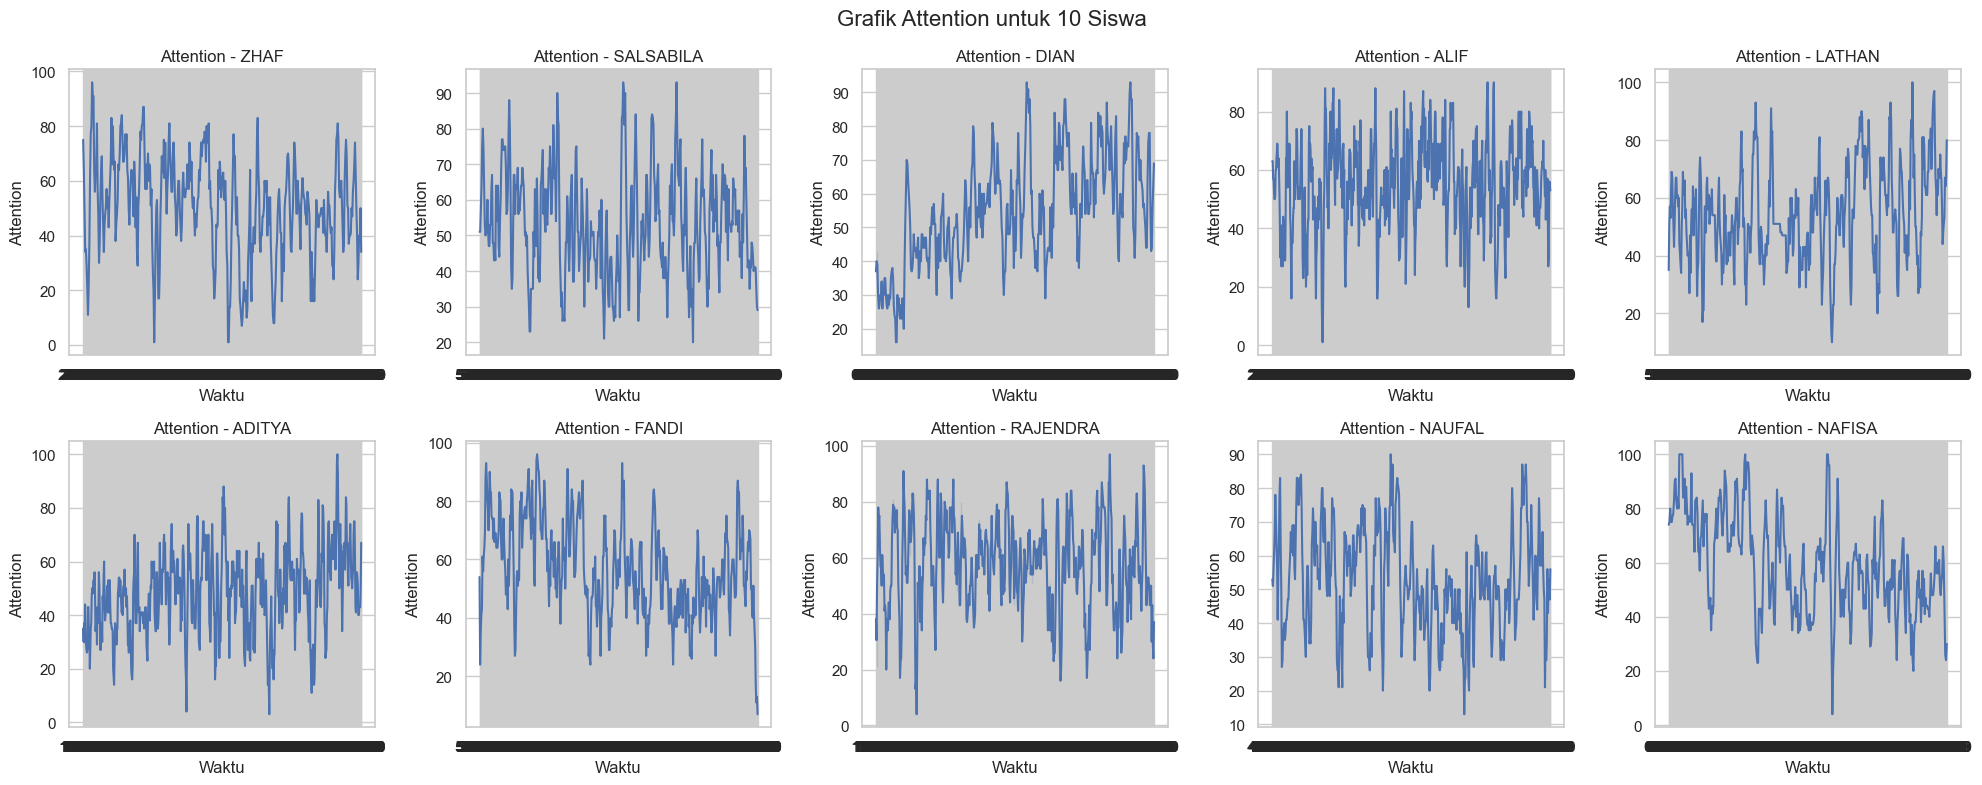

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Daftar nama DataFrame
df_names = ['df_ZHAF', 'df_SALSABILA', 'df_DIAN', 'df_ALIF', 'df_LATHAN', 
            'df_ADITYA', 'df_FANDI', 'df_RAJENDRA', 'df_NAUFAL', 'df_NAFISA']

# Ambil DataFrame dari globals()
dataframes = [globals()[name] for name in df_names]
participant_names = [name.replace('df_', '') for name in df_names]

# Atur style
sns.set_theme(style="whitegrid")

# Buat subplot: 2 baris, 5 kolom (untuk 10 peserta)
fig, axes = plt.subplots(2, 5, figsize=(20, 8))
axes = axes.flatten()  # Ubah ke array 1D agar mudah diiterasi

# Plot setiap peserta
for i, (df, name) in enumerate(zip(dataframes, participant_names)):
    # Pastikan kolom ada
    if "'Time'" not in df.columns or "'Attention'" not in df.columns:
        print(f"⚠️ Kolom tidak ditemukan di {name}. Kolom yang ada: {df.columns.tolist()}")
        continue
    
    # Plot di subplot ke-i
    sns.lineplot(ax=axes[i], x="'Time'", y="'Attention'", data=df, linewidth=1.5)
    axes[i].set_title(f'Attention - {name}')
    axes[i].set_xlabel('Waktu')
    axes[i].set_ylabel('Attention')

# Sembunyikan subplot kosong jika ada (tidak perlu di sini karena tepat 10)
# Tapi tetap aman:
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle('Grafik Attention untuk 10 Siswa', fontsize=16)
plt.tight_layout()
plt.show()

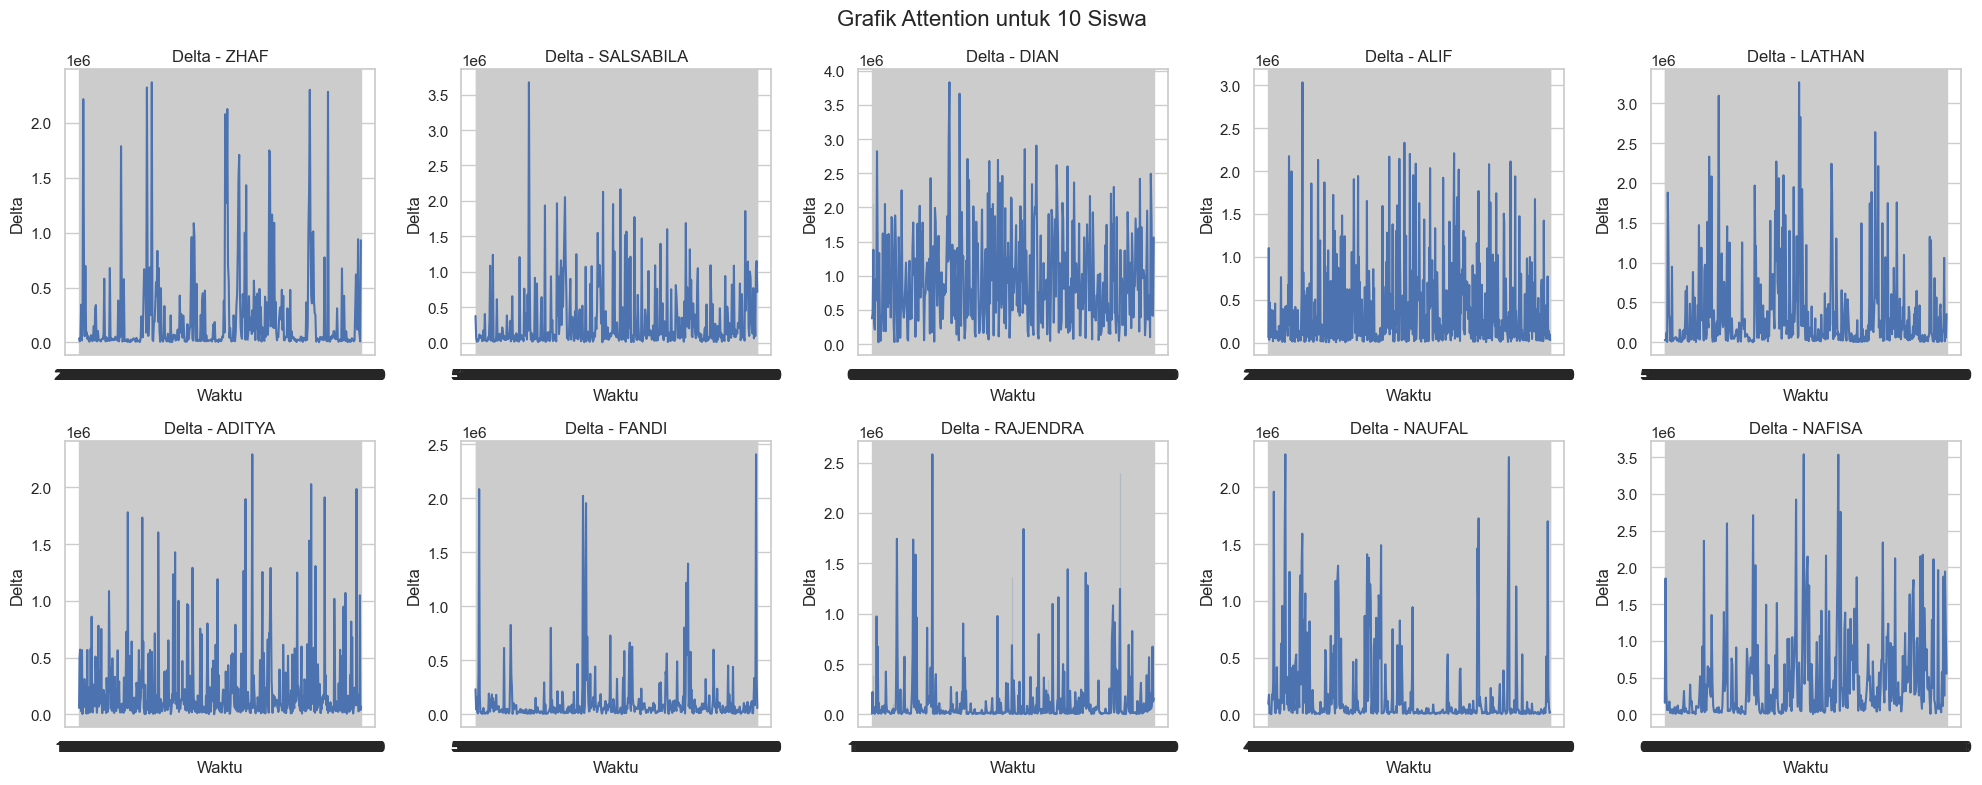

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Daftar nama DataFrame
df_names = ['df_ZHAF', 'df_SALSABILA', 'df_DIAN', 'df_ALIF', 'df_LATHAN', 
            'df_ADITYA', 'df_FANDI', 'df_RAJENDRA', 'df_NAUFAL', 'df_NAFISA']

# Ambil DataFrame dari globals()
dataframes = [globals()[name] for name in df_names]
participant_names = [name.replace('df_', '') for name in df_names]

# Atur style
sns.set_theme(style="whitegrid")

# Buat subplot: 2 baris, 5 kolom (untuk 10 peserta)
fig, axes = plt.subplots(2, 5, figsize=(20, 8))
axes = axes.flatten()  # Ubah ke array 1D agar mudah diiterasi

# Plot setiap peserta
for i, (df, name) in enumerate(zip(dataframes, participant_names)):
    # Pastikan kolom ada
    if "'Time'" not in df.columns or "'Delta'" not in df.columns:
        print(f"⚠️ Kolom tidak ditemukan di {name}. Kolom yang ada: {df.columns.tolist()}")
        continue
    
    # Plot di subplot ke-i
    sns.lineplot(ax=axes[i], x="'Time'", y="'Delta'", data=df, linewidth=1.5)
    axes[i].set_title(f'Delta - {name}')
    axes[i].set_xlabel('Waktu')
    axes[i].set_ylabel('Delta')

# Sembunyikan subplot kosong jika ada (tidak perlu di sini karena tepat 10)
# Tapi tetap aman:
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle('Grafik Attention untuk 10 Siswa', fontsize=16)
plt.tight_layout()
plt.show()

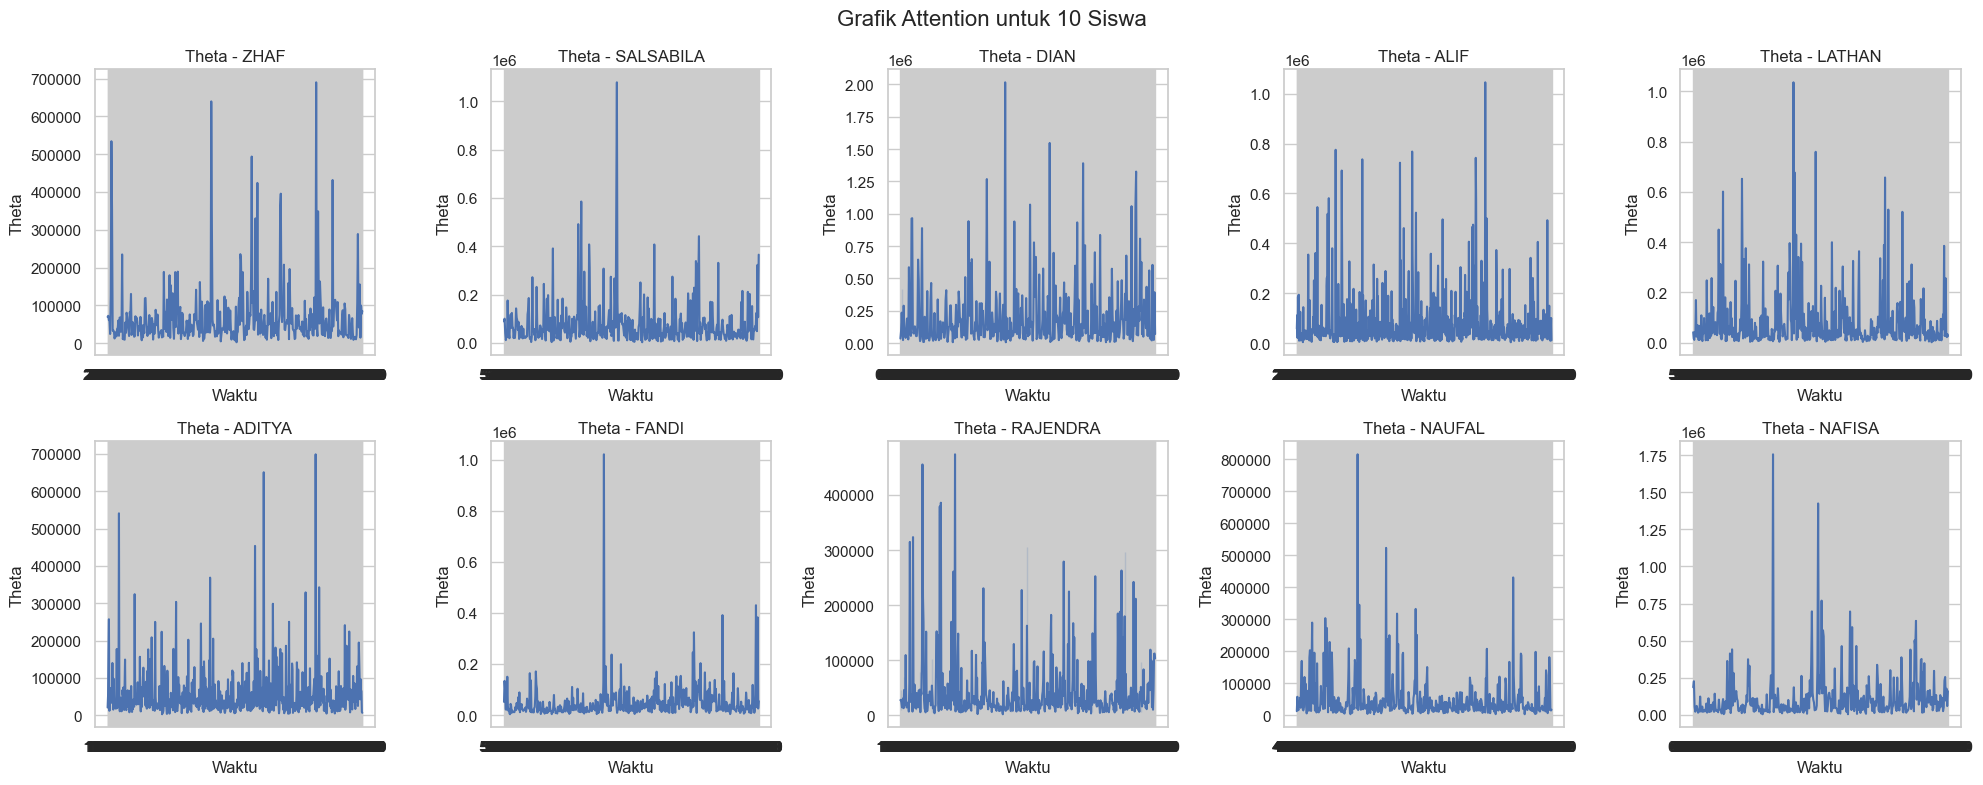

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Daftar nama DataFrame
df_names = ['df_ZHAF', 'df_SALSABILA', 'df_DIAN', 'df_ALIF', 'df_LATHAN', 
            'df_ADITYA', 'df_FANDI', 'df_RAJENDRA', 'df_NAUFAL', 'df_NAFISA']

# Ambil DataFrame dari globals()
dataframes = [globals()[name] for name in df_names]
participant_names = [name.replace('df_', '') for name in df_names]

# Atur style
sns.set_theme(style="whitegrid")

# Buat subplot: 2 baris, 5 kolom (untuk 10 peserta)
fig, axes = plt.subplots(2, 5, figsize=(20, 8))
axes = axes.flatten()  # Ubah ke array 1D agar mudah diiterasi

# Plot setiap peserta
for i, (df, name) in enumerate(zip(dataframes, participant_names)):
    # Pastikan kolom ada
    if "'Time'" not in df.columns or "'Theta'" not in df.columns:
        print(f"⚠️ Kolom tidak ditemukan di {name}. Kolom yang ada: {df.columns.tolist()}")
        continue
    
    # Plot di subplot ke-i
    sns.lineplot(ax=axes[i], x="'Time'", y="'Theta'", data=df, linewidth=1.5)
    axes[i].set_title(f'Theta - {name}')
    axes[i].set_xlabel('Waktu')
    axes[i].set_ylabel('Theta')

# Sembunyikan subplot kosong jika ada (tidak perlu di sini karena tepat 10)
# Tapi tetap aman:
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle('Grafik Attention untuk 10 Siswa', fontsize=16)
plt.tight_layout()
plt.show()

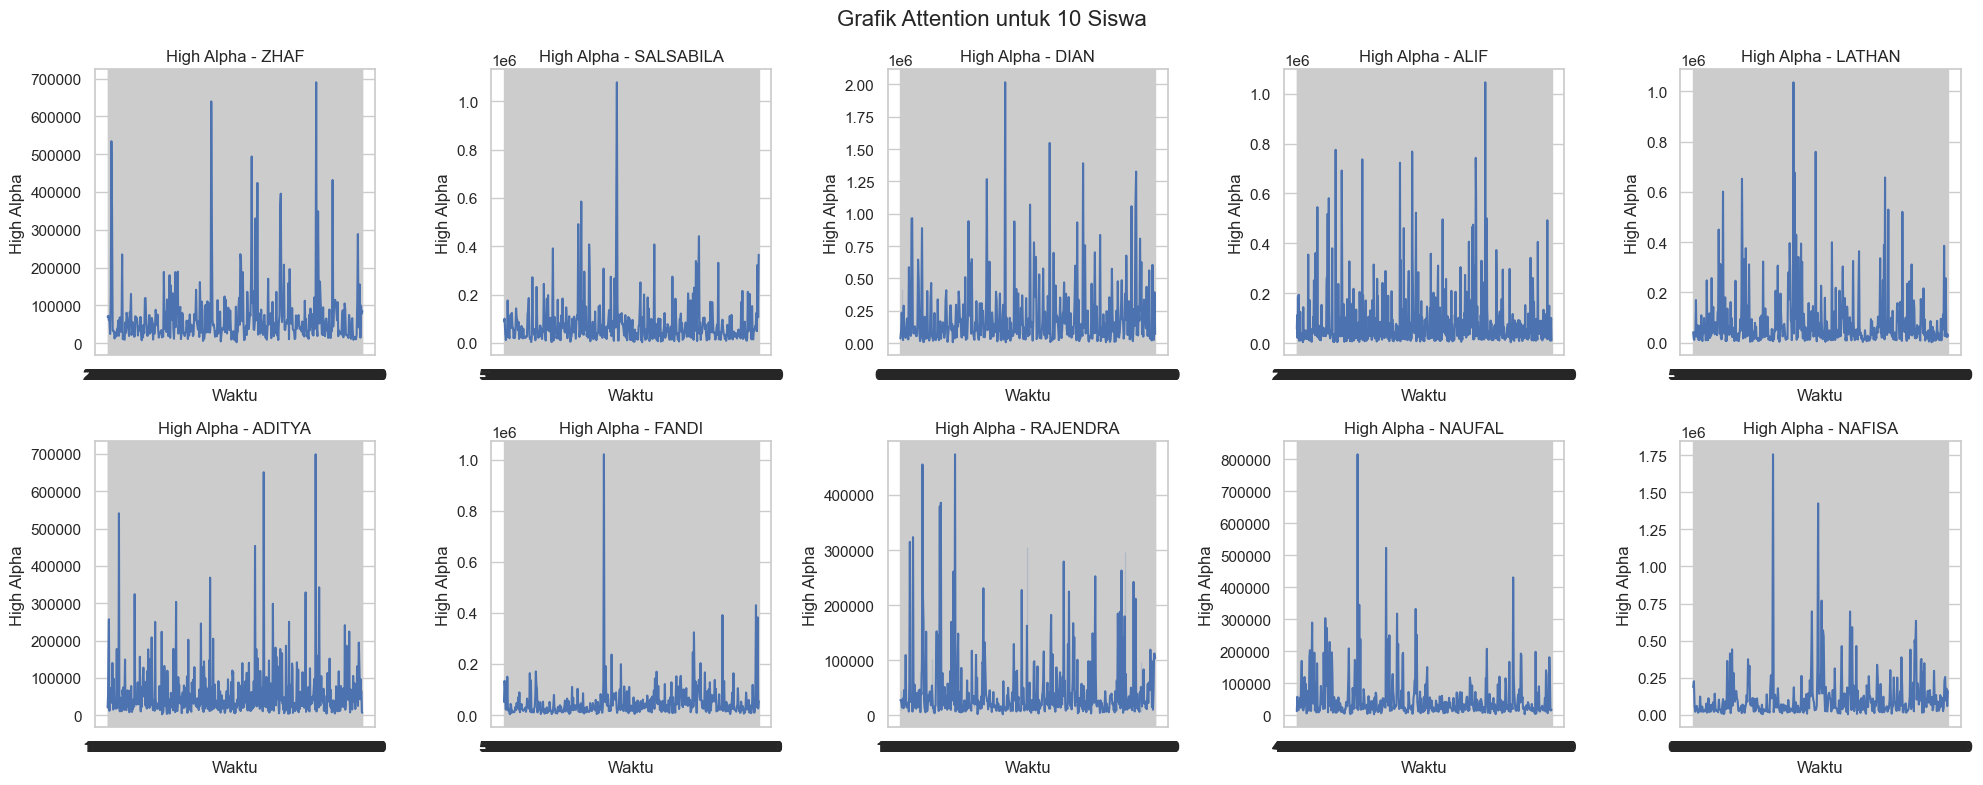

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Daftar nama DataFrame
df_names = ['df_ZHAF', 'df_SALSABILA', 'df_DIAN', 'df_ALIF', 'df_LATHAN', 
            'df_ADITYA', 'df_FANDI', 'df_RAJENDRA', 'df_NAUFAL', 'df_NAFISA']

# Ambil DataFrame dari globals()
dataframes = [globals()[name] for name in df_names]
participant_names = [name.replace('df_', '') for name in df_names]

# Atur style
sns.set_theme(style="whitegrid")

# Buat subplot: 2 baris, 5 kolom (untuk 10 peserta)
fig, axes = plt.subplots(2, 5, figsize=(20, 8))
axes = axes.flatten()  # Ubah ke array 1D agar mudah diiterasi

# Plot setiap peserta
for i, (df, name) in enumerate(zip(dataframes, participant_names)):
    # Pastikan kolom ada
    if "'Time'" not in df.columns or "'High Alpha'" not in df.columns:
        print(f"⚠️ Kolom tidak ditemukan di {name}. Kolom yang ada: {df.columns.tolist()}")
        continue
    
    # Plot di subplot ke-i
    sns.lineplot(ax=axes[i], x="'Time'", y="'Theta'", data=df, linewidth=1.5)
    axes[i].set_title(f'High Alpha - {name}')
    axes[i].set_xlabel('Waktu')
    axes[i].set_ylabel('High Alpha')

# Sembunyikan subplot kosong jika ada (tidak perlu di sini karena tepat 10)
# Tapi tetap aman:
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle('Grafik Attention untuk 10 Siswa', fontsize=16)
plt.tight_layout()
plt.show()